# Trabalho Final N3: Projeto Completo de Ciência de Dados        

*   **Professor:** Paulo Rogério Pires Manseira
*   **Alunos:** Maruan Biasi El Achkar e Ricardo Falcão Schilieper
*   **GitHub:** github.com/manseiracredit

---

-----
## Parte 1: A Fundação do Projeto - O Problema de Negócio

### Domínio do Problema

Nosso projeto é relacionado à Astronomia, mais especificamente na área de classificação de objetos celestiais, utilizando dados do Sloan Digital Sky Survey (SDSS), um dos maiores projetos de mapeamento astronômico da atualidade, realizado a partir de um telescópio digital localizado no Novo México, Estados Unidos.

A classificação manual de objetos celestiais, como estrelas, galáxias e quasares, é extremamente demorada e praticamente inviável, devido ao alto volume e grande complexidade dos dados.

Nosso projeto é relevante pois resolve um problema clássico da astronomia, automatizando a classificação de objetos astronômicos a partir de suas características observadas.


### Pergunta de Negócio

**Pergunta:** É possível classificar de forma automática se um objeto é uma estrela, uma galáxia ou um quasar, a partir de suas características observadas durante o projeto SDSS?

Essa pergunta será respondida de acordo com a avaliação do nosso modelo, que testará se o modelo foi capaz de classificar corretamente os corpos celestes.

### Objetivo do Modelo

Nosso objetivo é construir um classificador automático que, a partir de características espectrais observadas no projeto SDSS, é  capaz de dizer se o corpo celeste é uma estrela, uma galáxia ou um quasar.



-----
## Parte 2: A Jornada dos Dados - Pipeline e Arquitetura

### 2.1. Origem e Repositório de Dados

- O dataset **Stellar Classification Dataset - SDSS17** apresenta características e a classifiação de 100.000 corpos celestes distintos, observados pelo projeto de mapeamento astronômico SDSS.

- A fonte do dataset é o website Kaggle.

- **Fonte:** https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17


- Os dados utilizados pelo Dataset vem originalmente da publicação RD17 do projeto SDSS, um dos maiores projetos de mapeamento astronômico da atualidade. Todos os dados são de domínio público e estão sob a licensa permissiva *Creative Commons Attribution license (CC-BY)*, disponível em: http://www.sdss.org/science/image-gallery/

- Citações:

> fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.

> Abdurro’uf et al., The Seventeenth data release of the Sloan Digital Sky Surveys: Complete Release of MaNGA, MaStar and APOGEE-2 DATA (Abdurro’uf et al. submitted to ApJS) [arXiv:2112.02026]

- Nosso projeto utiliza um sistema de armazenamento do tipo **Data Lake Simples**. Os dados brutos provenientes do Kaggle são armazenados em um Data Lake em um arquivo do tipo .csv (star_classification.csv). Todo o tratamento desses dados é feito em memória, através de um Dataframe Pandas. Escolhemos essa arquitetura pois a quantidade de dados, que fica em torno de 1.800.000 de dados numéricos, é pequeno o suficiente para ser carregado em memória. O uso de arquiteturas mais complexas e parrudas, como um Data Warehouse ou Lake House não se mostrou necessário, pois não utiliamos diversas fontes nem multiplas etapas complexas de transformação e tratamento de dados.

### 2.2. Apresente o Pipeline de Dados

- **Ingestão**

O dataset original foi importado do Kaggle em formato .csv; A ingestão no sistema foi feita através de um dataframe pandas, com os dados sendo lidos e extraidos do .csv pela função pandas *"pd.read_csv()"*. Como o dataset já veio limpo, não foi necessário o uso de sistemas complexos de armazenamento e tratamento de dados.

- **Limpeza e Transformação (ETL/ELT)**

Testamos os dados para valores ausentes, entradas duplicadss e formatos diferentes porém não encontramos nada, o dataset já estava limpo e formatado. Por isso, não foi necessária nenhuma etapa pesada de limpeza e transformação de dados.

- **Análise Exploratória (EDA)**

A análise nos ajudou a entender melhor nosso dataset, com o maior colaborador sendo o heatmap, um gráfico que mostra a relação de cada coluna numérica com nossa coluna target. O heatmap nos mostrou que mesmo onde existe relação, ela é fraca, isso nos permitiu decidir melhor quais algorítimos utilizar, já que nem todo algorítimo funciona bem em cenários com pouca correlação linear.

- **Preparação para Modelagem**

Como o dataset já é totalmente numérico, a preparação foi simples. Decidimos não descartar nenhuma coluna, pois, como vamos usar algorítimos que tem um bom desempenho em cenários com baixa correlação linear, chegamos a conclusão de que não seria necessário descartar nenhuma coluna. A única alteração que tivemos que fazer foi converter nossa coluna target, originalmente textual, em uma coluna numérica, devido aos requisitos dos algorítimos selecionados, isso foi feito usando um sistema de *label encoding*.

Além disso, organizamos e separamos os dados em conjuntos de treino e de teste, sendo 80% dos dados para treino e 20% para teste.

---
## Parte 3: O Coração do Projeto - Modelagem e Avaliação Comparativa

### 3.1. Treinamento de Três Modelos

**Algoritmos escolhidos:**

- **KNN** (k-nearest neighbors algorithm)
- **XGBoost** (eXtreme Gradient Boosting)
- **Random Forest**

### Avaliação com Três Métricas

**Métricas escolhidas:**

- **Acurácia**

Mede a porcentagem total de acertos do modelo, escolhida pois mostra quanto o modelo foi capaz de identificar corretamente o tipo de objeto celestial.

- **Recall**

Mede a taxa de acerto de cada classe, escolhido pois garante que o modelo não ignore a classe menos comum, os quasares.


- **F1**

Combina outras duas métricas, a acurácia e o recall, em uma única métrica, escolhida pois mostra o equilíbrio entre acertar, sem deixando informações passarem despercebidas.



### Análise Comparativa dos Resultados

| MODELO          | ACCURACY | RECALL | F1-SCORE |
|-----------------|----------|--------|----------|
| KNN             | 0.7114   | 0.7114 | 0.6933   |
| XGBOOST         | 0.9770   | 0.9770 | 0.9769   |
| RANDOM FOREST   | 0.9802   | 0.9802 | 0.9801   |


- **Conclusão:** Todas as métricas mostraram que o melhor modelo é o **Random Forest**.

-----
# Desenvolvimento do Projeto

## Ingestão de dados

### Importar Dataset
**Fonte:** https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stellar-classification-dataset-sdss17")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'stellar-classification-dataset-sdss17' dataset.
Path to dataset files: /kaggle/input/stellar-classification-dataset-sdss17


### Criar Dataframe

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path_csv = os.path.join(path, 'star_classification.csv')

df = pd.read_csv(path_csv)

display(df.head(3))

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299


## Limpeza e Transformação (ETL/ELT)

### Verificar ausência de dados

In [10]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

if missing_data.sum() == 0:
    print('Sem dados ausentes.')

Series([], dtype: int64)
Sem dados ausentes.


### Verificar dados duplicados

In [11]:
num_duplicates = df.duplicated().sum()

if num_duplicates > 0:
    print(f'{num_duplicates} linhas duplicadas.')
else:
    print('Sem linhas duplicadas.')

Sem linhas duplicadas.


### Verificar tipos de dados

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

### Separar conjuntos de Treino e Teste (80% - 20%)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Criar copia do dataframe
df_encoded = df.copy()

le = LabelEncoder()

df_encoded['class_encoded'] = le.fit_transform(df_encoded['class'])

X = df_encoded.drop(columns=['obj_ID', 'class', 'class_encoded'])
y = df_encoded['class_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (80000, 16)
Shape of X_test: (20000, 16)
Shape of y_train: (80000,)
Shape of y_test: (20000,)


## EDA

### Heatmap de Relevância

Mapeamento da classe original para valores codificados: {'GALAXY': np.int64(0), 'QSO': np.int64(1), 'STAR': np.int64(2)}



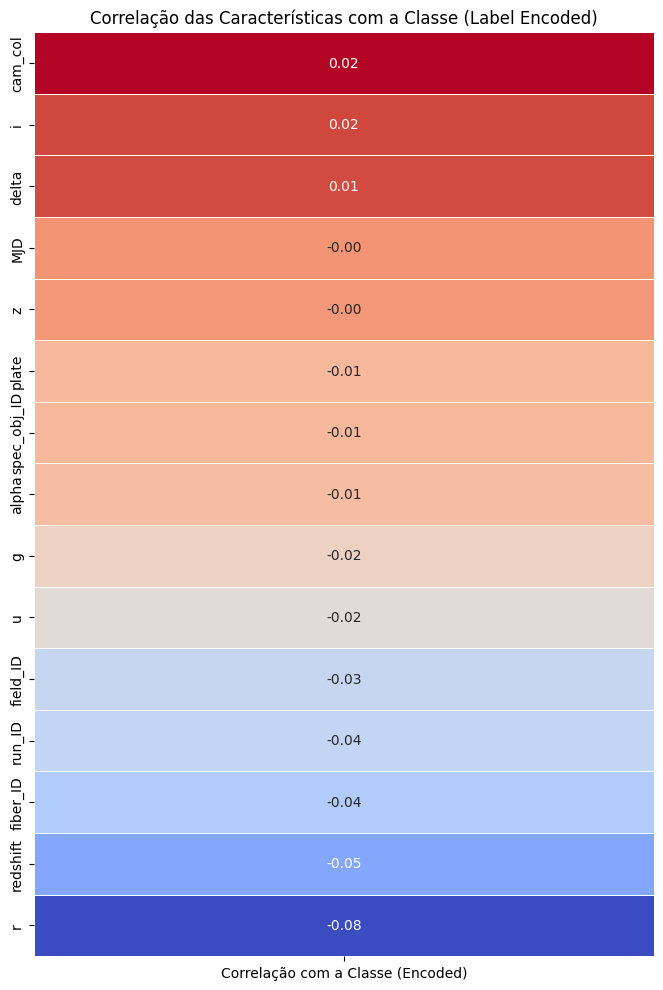

In [14]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Criar copia do dataframe
df_encoded = df.copy()

le = LabelEncoder()

df_encoded['class_encoded'] = le.fit_transform(df_encoded['class'])

class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Mapeamento da classe original para valores codificados: {class_mapping}\n")

numerical_features_for_corr = [
    'alpha', 'delta', 'u', 'g', 'r', 'i', 'z',
    'run_ID', 'cam_col', 'field_ID', 'spec_obj_ID',
    'redshift', 'plate', 'MJD', 'fiber_ID', 'class_encoded'
]

df_corr_subset = df_encoded[numerical_features_for_corr]

corr_matrix = df_corr_subset.corr()

class_correlations = corr_matrix['class_encoded'].drop('class_encoded').sort_values(ascending=False)

class_correlations_df = class_correlations.to_frame(name='Correlação com a Classe (Encoded)')

plt.figure(figsize=(8, 12))
sns.heatmap(class_correlations_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False)
plt.title('Correlação das Características com a Classe (Label Encoded)')
plt.show()

## Modelos

### KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=12)

# Treeino
print("Treinando o KNN...")
knn.fit(X_train, y_train)
print("Treinamento KNN concluído.")
print("-------------------------------")

# Teste
print("Testando o KNN...")
y_pred_knn = knn.predict(X_test)
print("Teste do KNN concluído.")
print("-------------------------------")

#  Metricas de avaliacao
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f"Resultados do KNN:\n")
print(f"Acurácia: {accuracy_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")

# guardar metricas
results = {
    'KNN': {'Accuracy': accuracy_knn, 'Recall': recall_knn, 'F1-Score': f1_knn}
}


Treinando o KNN...
Treinamento KNN concluído.
-------------------------------
Testando o KNN...
Teste do KNN concluído.
-------------------------------
Resultados do KNN:

Acurácia: 0.7114
Recall: 0.7114
F1-Score: 0.6933


### XGBoost

In [16]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, f1_score

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train)), random_state=42)

# Treino
print("Treinando o XGBoost...")
xgb_model.fit(X_train, y_train)
print("Treinamento do XGBoost concluído.")
print("-------------------------------")

# Teste
print("Testando o XGBoost...")
y_pred_xgb = xgb_model.predict(X_test)
print("Teste do XGBoost concluído.")
print("-------------------------------")

# Metricas de avaliacao
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"Resultados do XGBoost:\n")
print(f"Acurácia: {accuracy_xgb:.4f}")
print(f"Recall (weighted): {recall_xgb:.4f}")
print(f"F1-Score (weighted): {f1_xgb:.4f}")

# guarda metricas
results['XGBoost'] = {'Accuracy': accuracy_xgb, 'Recall': recall_xgb, 'F1-Score': f1_xgb}


Treinando o XGBoost...
Treinamento do XGBoost concluído.
-------------------------------
Testando o XGBoost...
Teste do XGBoost concluído.
-------------------------------
Resultados do XGBoost:

Acurácia: 0.9770
Recall (weighted): 0.9770
F1-Score (weighted): 0.9769


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score

rf_model = RandomForestClassifier(random_state=42)

# Treino
print("Treinando o Random Forest...")
rf_model.fit(X_train, y_train)
print("Treinamento do Random Forest concluído.")
print("-------------------------------")

# Teste
print("Testando o Random Forest...")
y_pred_rf = rf_model.predict(X_test)
print("Teste do Random Forest concluído.")
print("-------------------------------")


# Metricas avaliacadacao
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')


print(f"Resultados do Random Forest:\n")
print(f"Acurácia: {accuracy_rf:.4f}")
print(f"Recall (weighted): {recall_rf:.4f}")
print(f"F1-Score (weighted): {f1_rf:.4f}")

# salvar metricas
results['Random Forest'] = {'Accuracy': accuracy_rf, 'Recall': recall_rf, 'F1-Score': f1_rf}

Treinando o Random Forest...
Treinamento do Random Forest concluído.
-------------------------------
Testando o Random Forest...
Teste do Random Forest concluído.
-------------------------------
Resultados do Random Forest:

Acurácia: 0.9802
Recall (weighted): 0.9802
F1-Score (weighted): 0.9801


### Comparação de Resultados

In [18]:
import pandas as pd

print("Comparação de Resultado dos Modelos")

results_df = pd.DataFrame(results).T

display(results_df.round(4))

print("\n")
print("--------------------------------")

print("Maior Acurácia:")
print(results_df['Accuracy'].idxmax(), f" ({results_df['Accuracy'].max():.4f})")

print("\n")

print("Maior Recall:")
print(results_df['Recall'].idxmax(), f" ({results_df['Recall'].max():.4f})")

print("\n")

print("Maior F1-Score:")
print(results_df['F1-Score'].idxmax(), f" ({results_df['F1-Score'].max():.4f})")

Comparação de Resultado dos Modelos


,Accuracy,Recall,F1-Score
KNN,0.7114,0.7114,0.6933
XGBoost,0.9770,0.9770,0.9769
Random Forest,0.9802,0.9802,0.9801




--------------------------------
Maior Acurácia:
Random Forest  (0.9802)


Maior Recall:
Random Forest  (0.9802)


Maior F1-Score:
Random Forest  (0.9801)


-----
## Parte 4: Tornando o Modelo Útil - Deploy

In [20]:
import joblib

# Salvar o modelo Random Forest como .pkl
joblib.dump(rf_model, 'modelo_final.pkl')

print("Modelo random Forest salvo ")

Modelo random Forest salvo 
